In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import dopioe, unit_det


In [96]:
width=500
x = np.linspace(-width // 2, width // 2, 101)
y = np.linspace(-width // 2, width // 2, 101)
X, Y = np.meshgrid(x, y, indexing='ij')

xc, yc = 0.0, 0.0
Q11, Q12, Q22 = 1, .4, 1
psi0 = 250.0 
Rc = 85.0 
A = - psi0 / Rc**2

# rescale Q to have unit determinant
Q, _ = unit_det(Q=np.array([[Q11, Q12], [Q12, Q22]]))
q11, q12, q22 = Q[0,0], Q[0,1], Q[1,1]

dx, dy = X - xc, Y - yc
rho2 = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
Qr2 = (q11*dx + q12*dy)**2 + (q12*dx + q22*dy)**2 # ||Qr||
psi = psi0 * np.exp( - rho2 / Rc**2 )
u =   psi0 * np.exp( - rho2 / Rc**2 ) * ( 2*q12*dx + 2*q22*dy ) / Rc**2
v = - psi0 * np.exp( - rho2 / Rc**2 ) * ( 2*q11*dx + 2*q12*dy ) / Rc**2


In [97]:
df_res = pd.DataFrame({'nic': np.nan, 'njc': np.nan, 'r': np.nan, 'r_km': np.nan, 'xc': [xc], 'yc': [yc], 'w': [2*A*(q11+q22)*1e-3], 'q11': [q11], 'q12': [q12], 'q22': [q22],
                        'Rc': [Rc], 'psi0': [psi0], 'A': [A]})

spac = 1
nic, njc = np.arange(30, 70+spac, spac), np.arange(30, 70+spac, spac)
NIC, NJC = np.meshgrid(nic, njc)

df_tests = []
# for r in [20, 30, 40, 50, 75, 100]:
for r in [4, 6, 8, 10, 15, 20]:
    df = pd.DataFrame({
        'nic': NIC.flatten(),
        'njc': NJC.flatten(),
        'r': r
    })
    df_tests.append(df)

df_tests = pd.concat(df_tests, ignore_index=True)

# dic_tests = {}
skip = 1
for t, test in enumerate(df_tests.index):
    data = df_tests.loc[test]

    x1 = x[data.nic-data.r:data.nic+data.r+1:skip]
    y1 = np.array([y[data.njc]] * len(x1))

    u1 = u[data.nic-data.r:data.nic+data.r+1:skip, data.njc]
    v1 = v[data.nic-data.r:data.nic+data.r+1:skip, data.njc]

    y2 = y[data.njc-data.r:data.njc+data.r+1:skip]
    x2 = np.array([x[data.nic]] * len(y2))

    u2 = u[data.nic, data.njc-data.r:data.njc+data.r+1:skip]
    v2 = v[data.nic, data.njc-data.r:data.njc+data.r+1:skip]

    points1 = set(zip(x1, y1)); points2 = set(zip(x2, y2))
    common_points = points1 & points2
    # Remove duplicates from (x1, y1, u1, v1)
    mask = ~np.array([(x, y) in common_points for x, y in zip(x1, y1)])
    x1f = x1[mask]; y1f = y1[mask]; u1f = u1[mask]; v1f = v1[mask]
    # Concatenate with unaltered second set
    xi = np.concatenate([x1f, x2]); yi = np.concatenate([y1f, y2])
    ui = np.concatenate([u1f, u2]); vi = np.concatenate([v1f, v2])

    xc_dop, yc_dop, w_dop, Q_dop, Rc_dop, psi0_dop, A_dop = dopioe(x1, y1, u1, v1, x2, y2, u2, v2, plot_flag=False)
    w_dop *= 1e-3

    df_res.loc[len(df_res)] = {'nic': data.nic, 'njc': data.njc, 'r': data.r, 'r_km': data.r*(x[1]-x[0]), 'xc': xc_dop, 'yc': yc_dop, 'w': w_dop,
                               'q11': Q_dop[0,0], 'q12': Q_dop[0,1], 'q22': Q_dop[1,1],
                               'Rc': Rc_dop, 'psi0': psi0_dop, 'A': A_dop}


df_res.index = ['Control'] + list(df_tests.index)
df_res


/home/z5297792/UNSW-MRes/MRes/modules/utils.py:456: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(vt_model, rho2, vt, p0=[A0, Rc0],
/home/z5297792/UNSW-MRes/MRes/modules/utils.py:456: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(vt_model, rho2, vt, p0=[A0, Rc0],
/home/z5297792/UNSW-MRes/MRes/modules/utils.py:456: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(vt_model, rho2, vt, p0=[A0, Rc0],
/home/z5297792/UNSW-MRes/MRes/modules/utils.py:456: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(vt_model, rho2, vt, p0=[A0, Rc0],
/home/z5297792/UNSW-MRes/MRes/modules/utils.py:456: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(vt_model, rho2, vt, p0=[A0, Rc0],
/home/z5297792/UNSW-MRes/MRes/modules/utils.py:456: OptimizeWarning: Covariance of the parameters could not be esti

,nic,njc,r,r_km,xc,yc,w,q11,q12,q22,Rc,psi0,A
Control,NaN,NaN,NaN,NaN,0.000000,0.000000,-0.000151,1.091089,0.436436,1.091089,85.000000,250.000000,-0.034602
0,30.0,30.0,4.0,20.0,-426.771496,-426.771496,0.000045,0.063468,1.002012,0.063468,694.975218,-86425.512988,0.178938
1,31.0,30.0,4.0,20.0,259114.720998,86454.143159,-0.000410,0.334067,-0.993304,-0.039951,NaN,NaN,NaN
2,32.0,30.0,4.0,20.0,-56.423795,-2724.955424,0.000268,0.001628,-0.999991,-0.010792,396.303649,12.890083,-0.000082
3,33.0,30.0,4.0,20.0,-49.709390,1120.671546,-0.000228,0.004656,-1.000061,0.026113,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,66.0,70.0,20.0,100.0,118.757441,102.704022,0.000009,1.363125,1.262200,1.902356,234.378389,-78.091834,0.001422
10082,67.0,70.0,20.0,100.0,111.625299,111.834820,0.000008,1.330370,1.099912,1.661046,228.732048,-73.962916,0.001414
10083,68.0,70.0,20.0,100.0,110.760332,115.894681,0.000008,1.315722,0.987117,1.500621,217.100197,-63.375047,0.001345
10084,69.0,70.0,20.0,100.0,112.877685,117.197011,0.000007,1.307438,0.900886,1.385607,215.520150,-57.518257,0.001238


In [101]:
df_err = df_res - df_res.iloc[0]
df_err['nic'] = df_res.nic
df_err['njc'] = df_res.njc
df_err['r'] = df_res.r
df_err['r_km'] = df_res.r_km
df_err = df_err.iloc[1:]
df_err


,nic,njc,r,r_km,xc,yc,w,q11,q12,q22,Rc,psi0,A
0,30.0,30.0,4.0,20.0,-426.771496,-426.771496,0.000196,-1.027621,0.565576,-1.027621,609.975218,-86675.512988,0.213540
1,31.0,30.0,4.0,20.0,259114.720998,86454.143159,-0.000259,-0.757022,-1.429740,-1.131040,NaN,NaN,NaN
2,32.0,30.0,4.0,20.0,-56.423795,-2724.955424,0.000419,-1.089461,-1.436427,-1.101881,311.303649,-237.109917,0.034520
3,33.0,30.0,4.0,20.0,-49.709390,1120.671546,-0.000077,-1.086433,-1.436497,-1.064977,NaN,NaN,NaN
4,34.0,30.0,4.0,20.0,-38.319417,395.798787,0.000017,-1.069064,-1.437231,-1.018848,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,66.0,70.0,20.0,100.0,118.757441,102.704022,0.000160,0.272036,0.825764,0.811267,149.378389,-328.091834,0.036024
10082,67.0,70.0,20.0,100.0,111.625299,111.834820,0.000159,0.239281,0.663476,0.569957,143.732048,-323.962916,0.036016
10083,68.0,70.0,20.0,100.0,110.760332,115.894681,0.000159,0.224633,0.550681,0.409531,132.100197,-313.375047,0.035947
10084,69.0,70.0,20.0,100.0,112.877685,117.197011,0.000158,0.216349,0.464450,0.294517,130.520150,-307.518257,0.035840


In [102]:
df_err['err'] = np.hypot(df_err['xc'].values, df_err['yc'].values)
idx = df_err.groupby(['nic', 'njc'])['err'].idxmin()
df_opt = df_err.loc[idx].reset_index(drop=True)
df_opt


,nic,njc,r,r_km,xc,yc,w,q11,q12,q22,Rc,psi0,A,err
0,30.0,30.0,20.0,100.0,-116.675739,-116.675739,0.000157,0.209020,0.394397,0.209020,121.364946,-297.298649,0.035713,165.004412
1,30.0,31.0,15.0,75.0,100.244531,26.157867,0.000097,-0.910652,-1.449819,-0.941751,NaN,NaN,NaN,103.601159
2,30.0,32.0,15.0,75.0,63.865896,-6.847212,0.000096,-0.847106,-1.458580,-0.907553,NaN,NaN,NaN,64.231900
3,30.0,33.0,15.0,75.0,38.745950,-17.124296,0.000092,-0.766680,-1.472897,-0.862208,NaN,NaN,NaN,42.361423
4,30.0,34.0,15.0,75.0,19.820787,-19.421822,0.000088,-0.661524,-1.496366,-0.803704,55.641106,-239.314569,0.034062,27.750149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,70.0,66.0,15.0,75.0,-19.820787,19.421822,0.000088,-0.661524,-1.496366,-0.803704,55.641106,-239.314569,0.034062,27.750149
1677,70.0,67.0,15.0,75.0,-38.745950,17.124296,0.000092,-0.766680,-1.472897,-0.862208,NaN,NaN,NaN,42.361423
1678,70.0,68.0,15.0,75.0,-63.865896,6.847212,0.000096,-0.847106,-1.458580,-0.907553,NaN,NaN,NaN,64.231900
1679,70.0,69.0,15.0,75.0,-100.244531,-26.157867,0.000097,-0.910652,-1.449819,-0.941751,NaN,NaN,NaN,103.601159


Text(0, 0.5, 'y (km)')

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


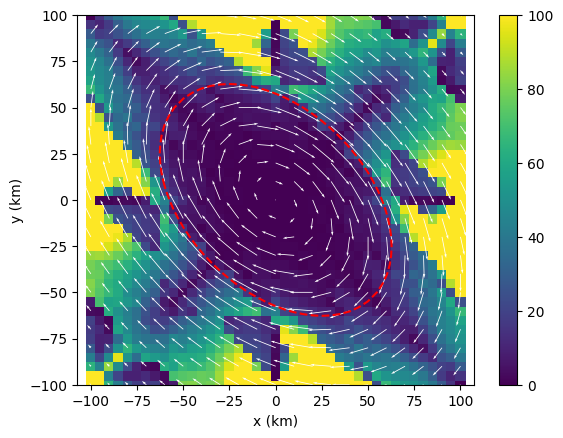

In [103]:
F = np.full_like(X, np.nan)
F[df_opt['nic'].astype(int).values,
  df_opt['njc'].astype(int).values] = df_opt.err

# plt.contourf(X, Y, F, levels=df_opt.err.unique().sort())
plt.pcolor(X, Y, F, vmin=0, vmax=100)
plt.colorbar()

spacing, scale, width = 2, 40, 0.002 #0.004
plt.quiver(x[::spacing], y[::spacing], u[::spacing, ::spacing].T, v[::spacing, ::spacing].T, 
               alpha=1, scale=scale, width=width, color='w')

plt.contour(X, Y, rho2, levels=[Rc**2/2],
                     colors='r', linestyles='--')

plt.axis('equal')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('x (km)')
plt.ylabel('y (km)')


Text(0, 0.5, 'y (km)')

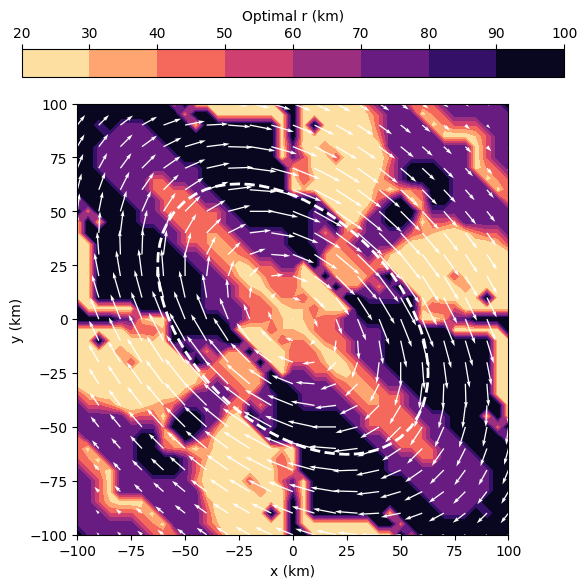

In [107]:
R = np.full_like(X, np.nan)
R[df_opt['nic'].astype(int).values,
  df_opt['njc'].astype(int).values] = df_opt.r_km

fig, ax = plt.subplots(figsize=(7,7))

cf = ax.contourf(X, Y, R, levels=df_opt.r_km.unique().sort(), cmap='magma_r')
fig.colorbar(cf, ax=ax, location='top', label='Optimal r (km)')

# spacing, scale, width = 2, 40, 0.002 #0.004
# ax.quiver(x[::spacing], y[::spacing], u[::spacing, ::spacing].T, v[::spacing, ::spacing].T, 
#                alpha=1, scale=scale, width=width, color='w')

spacing, scale, width = 2, 40, 0.003
ax.quiver(
    x[::spacing], y[::spacing],
    u[::spacing, ::spacing].T,
    v[::spacing, ::spacing].T,
    alpha=1, scale=scale, width=width, color='w'
)

ax.contour(X, Y, rho2, levels=[Rc**2/2],
                     colors='w', linestyles='--', linewidths=2)

# plt.axis('equal')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-100, 100)*5
ax.set_ylim(-100, 100)
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')


In [17]:
np.nanmedian(np.where(rho2 <=Rc**2/2, R, np.nan)), np.nanmedian(R)


(np.float64(75.0), np.float64(75.0))

In [19]:
df_tests.r.unique()

array([ 4,  6,  8, 10, 15, 20])

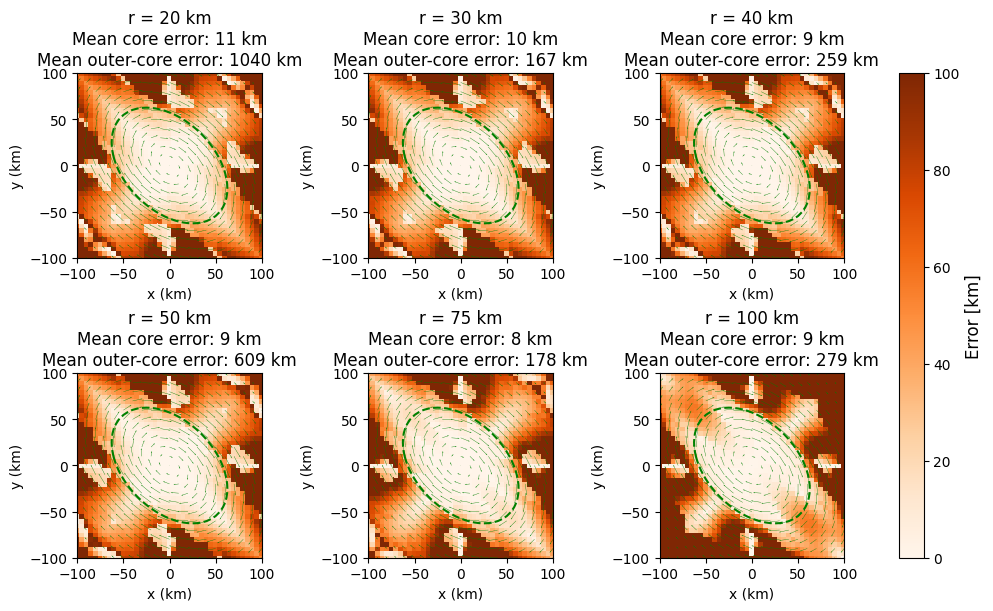

In [106]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)
axs = axs.ravel()

pcm = None

for ax, r in zip(axs, df_tests.r.unique()):
    F1 = np.full_like(X, np.nan)

    df1 = df_err[df_err.r_km == r * (x[1] - x[0])]

    F1[
        df1['nic'].astype(int).values,
        df1['njc'].astype(int).values
    ] = df1.err

    pcm = ax.pcolor(X, Y, F1, vmin=0, vmax=100, cmap='Oranges')

    spacing, scale, width = 2, 40, 0.002
    ax.quiver(
        x[::spacing], y[::spacing],
        u[::spacing, ::spacing].T,
        v[::spacing, ::spacing].T,
        alpha=1, scale=scale, width=width, color='g'
    )

    ax.contour(X, Y, rho2, levels=[Rc**2 / 2],
               colors='g', linestyles='--')

    ax.set_aspect('equal')
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    core = rho2 <= Rc**2 / 2
    outer = ~core
    
    mean_error_core = np.nanmean(F1[core])
    mean_error_outer = np.nanmean(F1[outer])
    
    ax.set_title(
        f"r = {int(r * (x[1] - x[0]))} km\n"
        f"Mean core error: {mean_error_core:.0f} km\n"
        f"Mean outer-core error: {mean_error_outer:.0f} km"
    )

# shared colorbar on the far right
cbar = fig.colorbar(pcm, ax=axs, location='right', pad=0.05)
cbar.set_label('Error [km]', fontsize=12)

# plt.tight_layout()
